In [38]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Loding the dataset
haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


#### 1.1 Analyze high level statistics of the dataset:<br>

In [40]:
print(haberman.shape)

(306, 4)


In [41]:
print(haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


Number of data points: 306 <br>
Number of features: 4 (including class attribute[Status])

In [42]:
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


##### Feature Info:
**Age**: Age of patient at the time of operation (Numerical)<br>
**Year**: Patient's year of operation (Numerical)<br>
**Nodes**: Number of positive axillary nodes detected (Numerical)<br>
**Status**: Survival status (Numerical)<br>
      1: patient survived 5 years or longer<br>
      2: patient died within 5 years<br>

In [43]:
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observation: <br>The Haberman is imbalanced dataset as the number of datapoints for each class is different

#### 1.2 Objective: 

- Classify the patient survival status whether <br> he/she will survive 5 years or longer Or <br> he/she will survive 5 year or less, based on given attributes

#### **1-D Scatter Plot** <br> From the given dataset we are ploting datapoints for axillary nodes with the survival Status

In [44]:
survive = haberman.loc[haberman['status'] == 1] # status 1 is survived
dead = haberman.loc[haberman['status']==2]  # status 2 is not nor survived

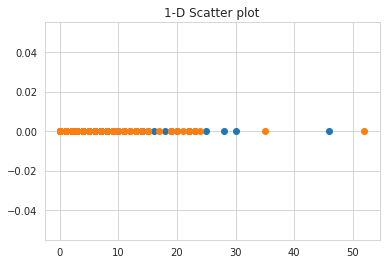

In [45]:
plt.plot(survive["nodes"],np.zeros_like(survive['nodes']),'o')
plt.plot(dead["nodes"],np.zeros_like(dead['nodes']),'o')
plt.title('1-D Scatter plot')
plt.show()

Observations:<br> 1. A lot of overlapping datapoints at every instance <br>2. We must try to plot 2-d scatter plot

#### **2-D Scatter Plot** <br> We are now ploting each pair of features from given attributes

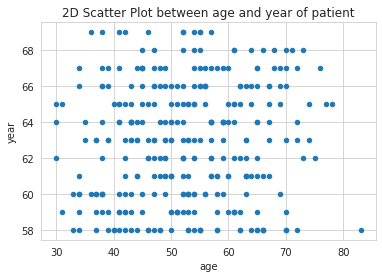

In [46]:
haberman.plot(kind='scatter', x='age', y='year')
plt.title('2D Scatter Plot between age and year of patient')
plt.show()

Observation: <br> 1. We are not able to make sense out of it <br> 2. Lets try it out with giving some color to each features data points

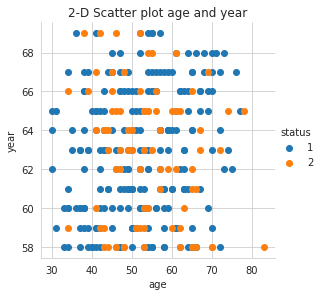

In [47]:
# 2-D Scatter plot with color-coding for each status 
# seaborn is refferred as sns
# age & year
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
              .map(plt.scatter, "age", "year")\
              .add_legend()
plt.title('2-D Scatter plot age and year')
plt.show()

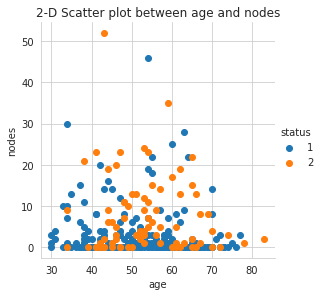

In [48]:
# age & nodes
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
              .map(plt.scatter, "age", "nodes")\
              .add_legend()
plt.title('2-D Scatter plot between age and nodes')
plt.show()

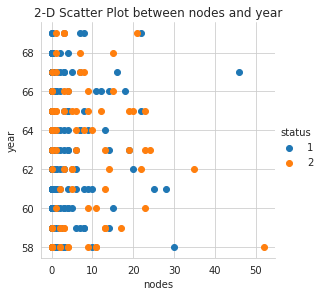

In [49]:
# nodes & year
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='status', size=4)\
              .map(plt.scatter, "nodes", "year")\
              .add_legend()
plt.title('2-D Scatter Plot between nodes and year')
plt.show()

Observations: <br> 1. Neither of the parameter were able to clearly distinguish between status 1 and 2. <br>2. We should come up with other plot for diff features for better understanding

#### Pair Plot

Most of the time there can be multiple features in dataset we need to gain insights as n-dimension. But we human can not see dimensions more 3-d, so to gain more insights from n-d dataset we use pair plots to get all combinations of features plotted against each other.

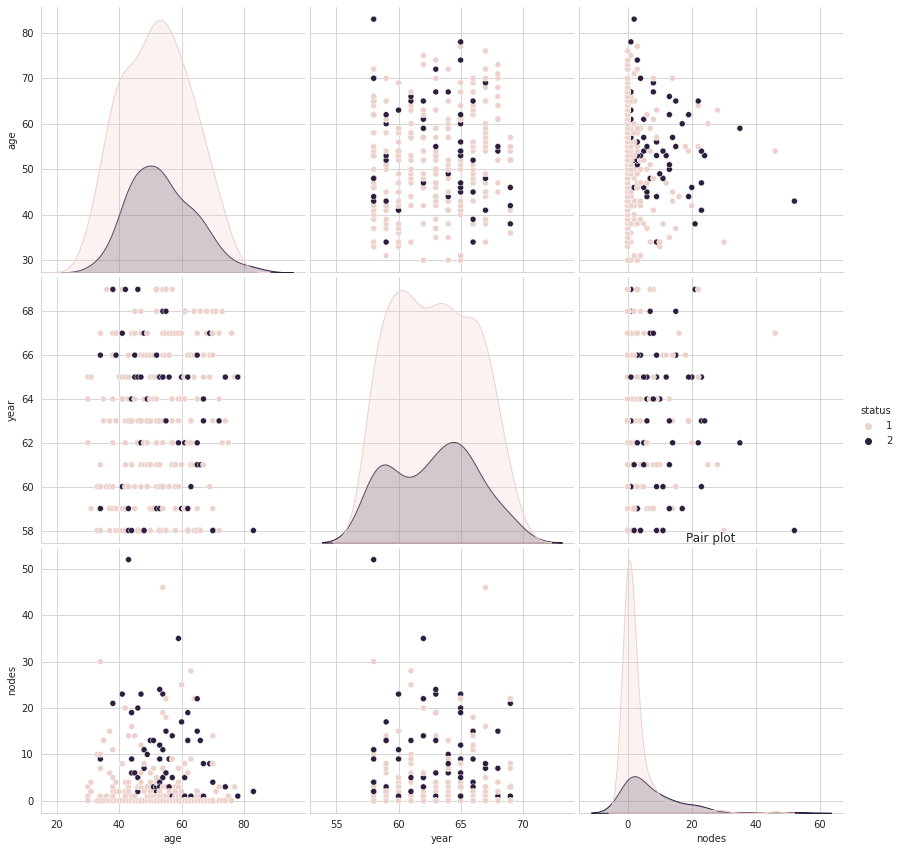

In [50]:
plt.close()
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="status", height=4);
plt.title('Pair plot')
plt.show()
# Note: The Diagonal element if PDF of each combination

Observations: <br>1. scatter plot between "age and nodes" is comparatively better than other scatter plot which we can classify the status. <br> 2. younger people have higher chances of survival <br>3. Adding if..else condition we can build a simple model<br> </t>i.e if age <= 45 && node <= 20 survive

#### Histogram, PDF's, CDF's

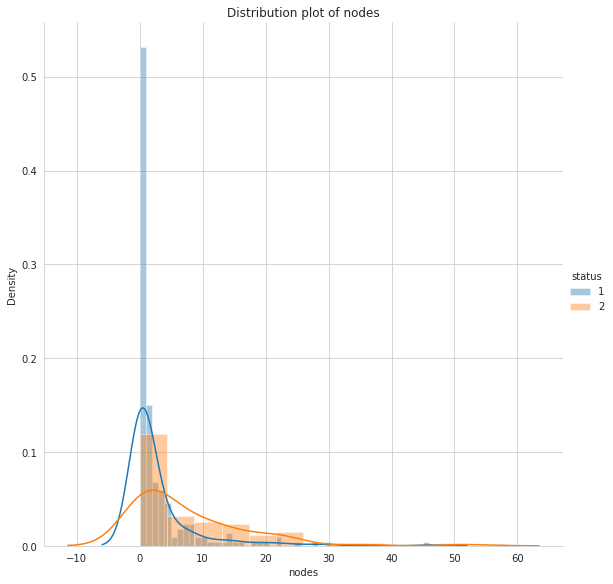

In [51]:
# distribution plot of nodes
sns.FacetGrid(haberman, hue="status", height=8)\
              .map(sns.distplot, "nodes")\
              .add_legend();
plt.title('Distribution plot of nodes')
plt.show()

Observations:<br>1. There is denser region near 0-5 for the PDF(Its the probability of (status) over the max value from x-axis) of node column.<br> 2. Which means patients with lower node have better probability of surviving

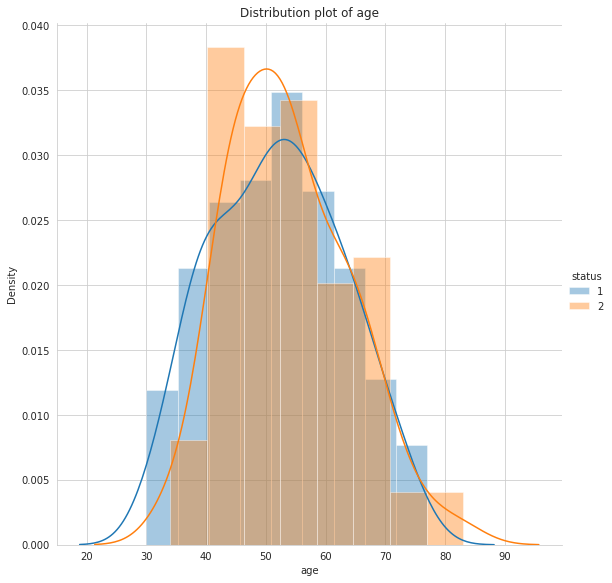

In [52]:
# distribution plot of age
sns.FacetGrid(haberman, hue="status", height=8)\
              .map(sns.distplot, "age")\
              .add_legend();
plt.title('Distribution plot of age')
plt.show()

Observations:<br>1. We can not classify because its overlapping<br>2. we can try with other feature as well

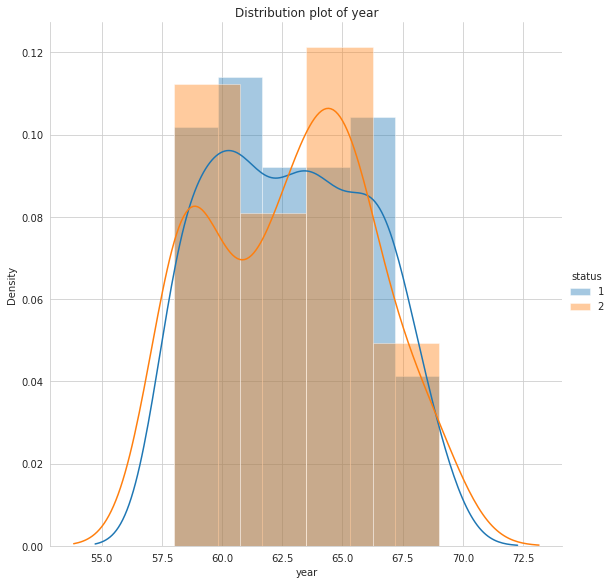

In [53]:
# distribution plot of year
sns.FacetGrid(haberman, hue="status", height=8)\
              .map(sns.distplot, "year")\
              .add_legend();
plt.title('Distribution plot of year')
plt.show()

Observations:<br>1. we can not classify both the classed , both are massively overlapped <br>2. We can try with other plots to classify

##### **Cumulative Density Function(CDF)**

Text(0.5, 1.0, 'PDF and CDF of feature nodes of alive')

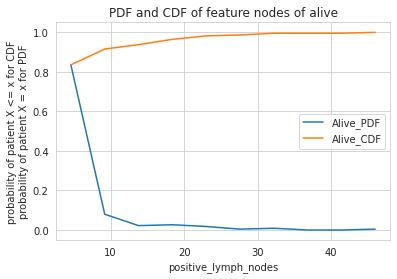

In [54]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of survival have 
#Plot CDF of positive lymph nodes
counts, bin_edges = np.histogram(survive['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Alive_PDF','Alive_CDF'])
plt.xlabel('positive_lymph_nodes')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')
plt.title('PDF and CDF of feature nodes of alive')

Text(0, 0.5, 'probability of patient X <= x for CDF\nprobability of patient X = x for PDF')

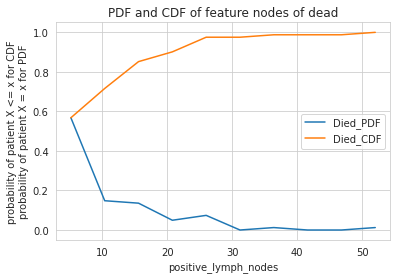

In [55]:
# We can visually see what percentage of died have
#Plot CDF of positive lymph nodes
counts, bin_edges = np.histogram(dead['nodes'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Died_PDF','Died_CDF'])
plt.title('PDF and CDF of feature nodes of dead')
plt.xlabel('positive_lymph_nodes')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')

Text(0.5, 1.0, 'PDF and CDF of feature age of survive')

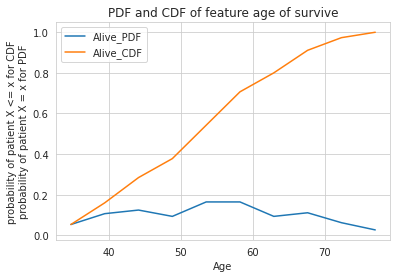

In [56]:
# Need for Cumulative Distribution Function (CDF) and PDF
# We can visually see what percentage of survival have 
counts, bin_edges = np.histogram(survive['age'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Alive_PDF','Alive_CDF'])
plt.xlabel('Age')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')
plt.title('PDF and CDF of feature age of survive')


Text(0.5, 1.0, 'PDF and CDF of feature age of dead')

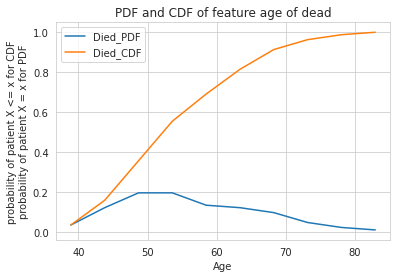

In [57]:
# We can visually see what percentage of died have
counts, bin_edges = np.histogram(dead['age'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Died_PDF','Died_CDF'])
plt.xlabel('Age')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')
plt.title('PDF and CDF of feature age of dead')

Text(0.5, 1.0, 'PDF and CDF of feature year of survive')

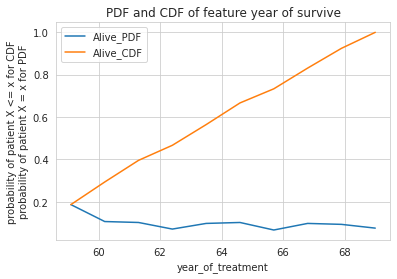

In [58]:
# Need for Cumulative Distribution Function (CDF) and PDF
# We can visually see what percentage of survival have 
counts, bin_edges = np.histogram(survive['year'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Alive_PDF','Alive_CDF'])
plt.xlabel('year_of_treatment')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')
plt.title('PDF and CDF of feature year of survive')

Text(0.5, 1.0, 'PDF and CDF of feature year of dead')

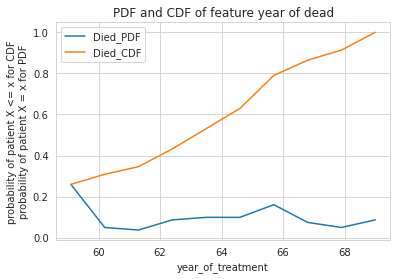

In [59]:
# We can visually see what percentage of died have
counts, bin_edges = np.histogram(dead['year'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend('status')
plt.legend(['Died_PDF','Died_CDF'])
plt.xlabel('year_of_treatment')
plt.ylabel('probability of patient X <= x for CDF\nprobability of patient X = x for PDF')
plt.title('PDF and CDF of feature year of dead')

**Observations from PDF's and CDF's**:<br>1. We can see from the 1st plot of CDF and PDF, the probability of survival is around 82% when lymph nodes are less.<br>2. In the 2nd plot, the probability of patient who survived is 58% and had lymph node less than 10<br> 3. In the 5th plot, the probability of patient who survived is 18% when they had treatment before the age 60<br>4. So eventually the probability of patients survival is high when he/she has node range in(0-9). 

#### Mean,Variance and Standard Deviation

In [60]:
# Mean of nodes
print('Means of nodes')
print(np.mean(survive['nodes']))
# added outlier value to see mean of survival
print(np.mean(np.append(survive['nodes'],80)))
print(np.mean(dead['nodes']))
# added outlier value to see mean of dead
print(np.mean(np.append(dead['nodes'],80)))
print('\nStd Deviation of nodes')
print(np.std(survive['nodes']))
print(np.std(dead['nodes']))

Means of nodes
2.7911111111111113
3.1327433628318584
7.45679012345679
8.341463414634147

Std Deviation of nodes
5.857258449412131
9.128776076761632


#### Median, Pencentile, Quantile, IQR, MAD(Median Absolute Deviation)

In [61]:
# Median of node
print('Median of nodes')
print(np.median(survive['nodes']))
# Median with outlier
print(np.median(np.append(survive['nodes'],80)))
print(np.median(dead['nodes']))
# Median with outlier
print(np.median(np.append(dead['nodes'],80)))

# quantiles of node
print("\nQuantiles")
print(np.percentile(survive['nodes'],np.arange(0,100,25)))
print(np.percentile(dead['nodes'],np.arange(0,100,25)))

# 90th percentile of node
print("\n90th Percentile")
print(np.percentile(survive['nodes'],90))
print(np.percentile(dead['nodes'],90))

# Median Absolute Deviation
from statsmodels import robust
print("\nMAD(Median Absolute Deviation)")
print(robust.mad(survive['nodes']))
print(robust.mad(dead['nodes']))

Median of nodes
0.0
0.0
4.0
4.0

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile
8.0
20.0

MAD(Median Absolute Deviation)
0.0
5.930408874022408


#### **Boxplot and Whiskers**

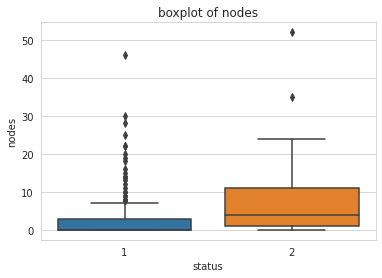

In [62]:
# boxplot of nodes with respect to status
sns.boxplot(x="status", y="nodes", data=haberman)
plt.title('boxplot of nodes')
plt.show()

Observation:<br>1. If you see status 2 is having 75th percentile is higher<br>2. Means 75% of patient will die if they have more nodes <br>3. The lesser nodes you have the more chances you have to survive

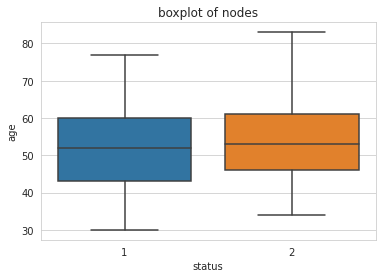

In [63]:
# boxplot of age with respect to status
sns.boxplot(x="status", y="age", data=haberman)
plt.title('boxplot of nodes')
plt.show()

Observation:<br>1. Probability of older patient to die is bit more than young patient

#### **Violin plots**

- A violin plot combines the benefits of the previous two plots and simplifies them

- Denser regions of the data are fatter, and sparser ones thinner in a violin plot

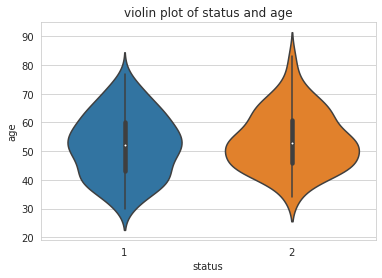

In [64]:
# violin plot of age
sns.violinplot(x="status", y="age", data=haberman, size=8)
plt.title('violin plot of status and age')
plt.show()

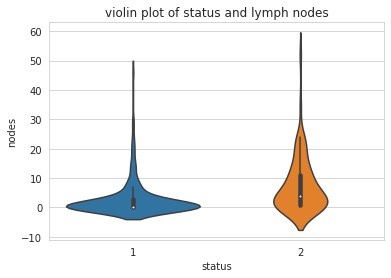

In [65]:
# violon plot of nodes
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title('violin plot of status and lymph nodes')
plt.show()

Observation:<br>1. The survival plot where node is less than 5 is denser<br>2. Where Non survival plot is denser when nodes are more.<br>3. Clearly less nodes have more chances of survival

#### **Final Observations/Conclusions**

**From Pair plots and Scatter plots**
- scatter plot between "age and nodes" is comparatively better than other scatter plot which we can classify the status.
- younger people have higher chances of survival

**From Distribution plots CDF's and PDF's**
- postive_lymph_nodes feature is better one to classify the status
- Patients having less node will have more chances of survival
- Probability of survival is around 82% when lymph nodes are less.
- Probability of patient who survived is 58% and had lymph node less than 10

**From Box plots and Whiskers**
- status of die is having 75th percentile higher which Means 75% of patient will die if they have more nodes
- Status of alive's 75th percentile is lesser which means 75% of patient will survive if lymph nodes are less than 10

**From Violin plots**
- The survival plot where node is less than 5 is denser
- Where Non survival plot is denser when nodes are more